In [1]:
from astropy.table import Table, join, Column
from astropy import units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format = "svg"

# My modules
from my_progs.catalog.read_icrfn import read_icrf3

Read the ICRF3 K catalog.

In [2]:
# Read ICRF3 K catalog
icrf3_k = read_icrf3(wv="k")

Have a glance of the catalog.

In [3]:
icrf3_k

icrf_name,iers_name,type,ra,dec,ra_err,dec_err,ra_dec_corr,mean_obs,pos_err,beg_obs,end_obs,nb_sess,nb_del
,,,deg,deg,mas,mas,,,,,,,
str16,str8,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
J000435.6-473619,0002-478,D,1.1485647359583333,-47.60544541102778,0.4516681517736428,1.0827,0.6589,57961.2,1.1267942729306641,57599.3,58067.8,7,13
J000504.3+542824,0002+541,--,1.2681805876666665,54.473590121250005,0.07321584713652726,0.0905,0.0477,57561.2,0.09069246230326641,53898.6,58181.5,9,732
J000557.1+382015,0003+380,--,1.4882307991666666,38.3375413845,0.05294498242586314,0.07369999999999999,-0.1988,57909.1,0.07512354105978385,57372.1,58195.8,10,724
J000613.8-062335,0003-066,--,1.5578870084583334,-6.393148817805556,0.047850566755598754,0.10609999999999999,-0.4903,57819.0,0.10909553579758349,56782.4,58181.5,9,658
J000903.9+062821,0006+061,--,2.2663827199999997,6.472566606222222,0.11506188429537391,0.22569999999999998,-0.3528,57837.4,0.23032386525156387,52782.5,58195.8,7,316
J001031.0+105829,0007+106,D,2.6291912593749993,10.974862327916666,0.04785840167457787,0.09199999999999998,-0.333,55132.2,0.09377908666520379,52782.5,58244.2,12,1043
J001101.2-261233,0008-264,--,2.7551947386666664,-26.209271354527775,0.07845899574871043,0.2045,-0.3768,57655.1,0.2069232370376186,57416.9,58070.2,9,298
J001135.2+082355,0009+081,--,2.8969566952083325,8.398773987166667,0.0753827899464934,0.1347,-0.2236,54738.5,0.13617954520385336,52782.5,58082.4,10,579


Seperate the sources into the "defining sources" and "other sources", and also "south" and "north".

In [4]:
# Defining sources
mask_def = (icrf3_k["type"] == "D")
icrf3_k_def = icrf3_k[mask_def]

# Other sources
mask_oth = (icrf3_k["type"] != "D")
icrf3_k_oth = icrf3_k[mask_oth]

# Southern sources
mask_sou = (icrf3_k["dec"] < 0)
icrf3_k_sou = icrf3_k[mask_sou]

# Northern sources
mask_nor = (icrf3_k["dec"] >= 0)
icrf3_k_nor = icrf3_k[mask_nor]

In [5]:
print("There are {} defining sources and {} other sources, "
      "{} sources in the northern hemisphere and {} in the south.".format(
      len(icrf3_k_def), len(icrf3_k_oth), len(icrf3_k_nor), len(icrf3_k_sou)))

There are 193 defining sources and 631 other sources, 451 sources in the northern hemisphere and 373 in the south.


Then I plotted the sky distribution of all these sources.

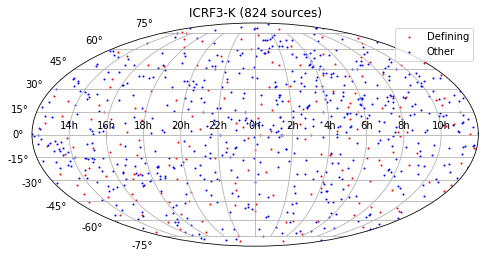

In [6]:
ra_def = coord.Angle(icrf3_k_def["ra"]).wrap_at(180*u.degree)
dec_def = coord.Angle(icrf3_k_def["dec"])

ra_oth = coord.Angle(icrf3_k_oth["ra"]).wrap_at(180*u.degree)
dec_oth = coord.Angle(icrf3_k_oth["dec"])

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra_def.radian, dec_def.radian, c="r", s=1, label="Defining")
ax.scatter(ra_oth.radian, dec_oth.radian, c="b", s=1, label="Other")
ax.set_xticklabels(["14h","16h","18h","20h","22h","0h","2h","4h","6h","8h","10h"])
ax.set_title("ICRF3-K (824 sources)")
ax.grid(True)
ax.legend(loc="upper right")

plt.savefig("../plots/icrf3_k_source_distribution.eps")

Also the sky ditribution of the formal error in right ascension, declination, and the correlation.

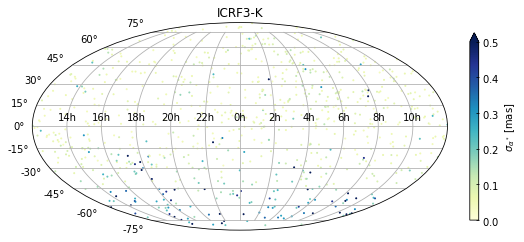

In [7]:
# The distribution of formal errors.
from mpl_toolkits.axes_grid1 import make_axes_locatable

ra_all = coord.Angle(icrf3_k["ra"]).wrap_at(180*u.degree)
dec_all = coord.Angle(icrf3_k["dec"])

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
sc = ax.scatter(ra_all.radian, dec_all.radian, c=icrf3_k["ra_err"], 
                s=1, vmin=0, vmax=0.5, cmap="YlGnBu")
ax.set_xticklabels(["14h","16h","18h","20h","22h","0h","2h","4h","6h","8h","10h"])
plt.colorbar(sc, extend="max",
             label="$\sigma_{\\alpha^*}$ [mas]", fraction=0.02)
ax.grid(True)
ax.set_title("ICRF3-K")

plt.savefig("../plots/icrf3_k_ra_error.eps")

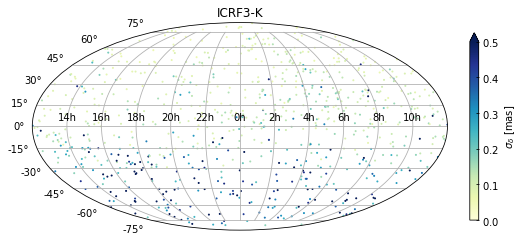

In [8]:
# The distribution of formal errors.
ra_all = coord.Angle(icrf3_k["ra"]).wrap_at(180*u.degree)
dec_all = coord.Angle(icrf3_k["dec"])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="mollweide")
sc = ax.scatter(ra_all.radian, dec_all.radian, c=icrf3_k["dec_err"],
                s=1, vmin=0, vmax=0.5, cmap="YlGnBu")
ax.set_xticklabels(["14h", "16h", "18h", "20h", "22h",
                    "0h", "2h", "4h", "6h", "8h", "10h"])
plt.colorbar(sc, extend="max",
             label="$\sigma_{\delta}$ [mas]", fraction=0.02)
ax.grid(True)
ax.set_title("ICRF3-K")

plt.savefig("../plots/icrf3_k_dec_error.eps")

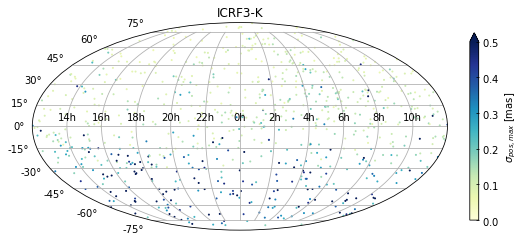

In [9]:
# The distribution of formal errors.
ra_all = coord.Angle(icrf3_k["ra"]).wrap_at(180*u.degree)
dec_all = coord.Angle(icrf3_k["dec"])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="mollweide")
sc = ax.scatter(ra_all.radian, dec_all.radian, c=icrf3_k["dec_err"],
                s=1, vmin=0, vmax=0.5, cmap="YlGnBu")
ax.set_xticklabels(["14h", "16h", "18h", "20h", "22h",
                    "0h", "2h", "4h", "6h", "8h", "10h"])
plt.colorbar(sc, extend="max",
             label="$\sigma_{pos,max}$ [mas]", fraction=0.02)
ax.grid(True)
ax.set_title("ICRF3-K")

plt.savefig("../plots/icrf3_k_pos_error.eps")


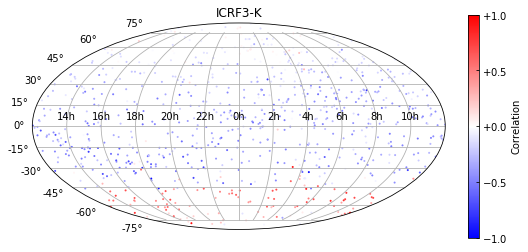

In [10]:
# The distribution of correlation between R.A. and Decl..
ra_all = coord.Angle(icrf3_k["ra"]).wrap_at(180*u.degree)
dec_all = coord.Angle(icrf3_k["dec"])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="mollweide")
sc = ax.scatter(ra_all.radian, dec_all.radian, c=icrf3_k["ra_dec_corr"],
                s=1, vmin=-1, vmax=1, cmap="bwr")
ax.set_xticklabels(["14h", "16h", "18h", "20h", "22h",
                    "0h", "2h", "4h", "6h", "8h", "10h"])
plt.colorbar(sc, ticks=np.arange(-1., 1.1, 0.5), format="$%+.1f$",
             label="Correlation", fraction=0.025)
ax.grid(True)
ax.set_title("ICRF3-K")

plt.savefig("../plots/icrf3_k_ra_dec_corr.eps")

Then I check the formal errors of the source positions.

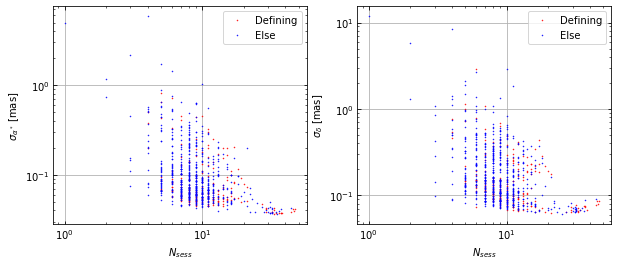

In [11]:
# Formal errors vs. number of observing sessions.
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

ax0.plot(icrf3_k_def["nb_sess"],
         icrf3_k_def["ra_err"], "r.", ms=1, label="Defining")
ax0.plot(icrf3_k_oth["nb_sess"],
         icrf3_k_oth["ra_err"], "b.", ms=1, label="Else")
ax0.set_xscale("log")
ax0.set_yscale("log")
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax0.set_ylabel("$\sigma_{\\alpha^*}$ [mas]")
ax0.set_xlabel("$N_{sess}$")
ax0.grid()
ax0.legend()

ax1.plot(icrf3_k_def["nb_sess"],
         icrf3_k_def["dec_err"], "r.", ms=1, label="Defining")
ax1.plot(icrf3_k_oth["nb_sess"],
         icrf3_k_oth["dec_err"], "b.", ms=1, label="Else")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax1.set_ylabel("$\sigma_{\\delta}$ [mas]")
ax1.set_xlabel("$N_{sess}$")
ax1.grid()
ax1.legend()

plt.savefig("../plots/icrf3_k_error_numsess.eps", dpi=100)

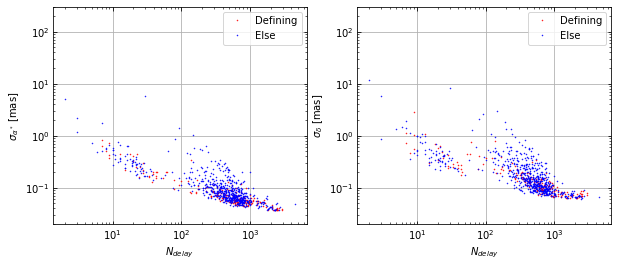

In [12]:
# Formal errors vs. number of observing delays.
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

ax0.plot(icrf3_k_def["nb_del"],
         icrf3_k_def["ra_err"], "r.", ms=1, label="Defining")
ax0.plot(icrf3_k_oth["nb_del"],
         icrf3_k_oth["ra_err"], "b.", ms=1, label="Else")
ax0.set_xscale("log")
ax0.set_yscale("log")
ax0.set_ylim([0.02, 300])
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax0.set_ylabel("$\sigma_{\\alpha^*}$ [mas]")
ax0.set_xlabel("$N_{delay}$")
ax0.grid()
ax0.legend()

ax1.plot(icrf3_k_def["nb_del"],
         icrf3_k_def["dec_err"], "r.", ms=1, label="Defining")
ax1.plot(icrf3_k_oth["nb_del"],
         icrf3_k_oth["dec_err"], "b.", ms=1, label="Else")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylim([0.02, 300])
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax1.set_ylabel("$\sigma_{\\delta}$ [mas]")
ax1.set_xlabel("$N_{delay}$")
ax1.grid()
ax1.legend()

plt.savefig("../plots/icrf3_k_error_numdelay.eps")

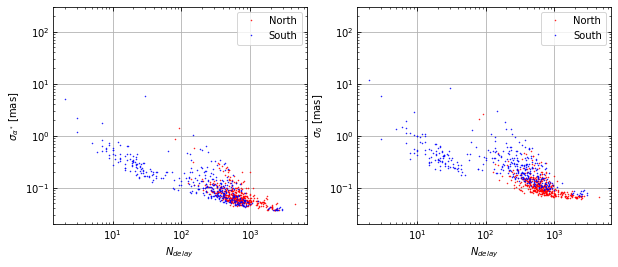

In [13]:
# Formal errors vs. number of observing delays.
# Sources are groupped into south and north.

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

ax0.plot(icrf3_k_nor["nb_del"],
         icrf3_k_nor["ra_err"], "r.", ms=1, label="North")
ax0.plot(icrf3_k_sou["nb_del"],
         icrf3_k_sou["ra_err"], "b.", ms=1, label="South")
ax0.set_xscale("log")
ax0.set_yscale("log")
ax0.set_ylim([0.02, 300])
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax0.set_ylabel("$\sigma_{\\alpha^*}$ [mas]")
ax0.set_xlabel("$N_{delay}$")
ax0.grid()
ax0.legend()

ax1.plot(icrf3_k_nor["nb_del"],
         icrf3_k_nor["dec_err"], "r.", ms=1, label="North")
ax1.plot(icrf3_k_sou["nb_del"],
         icrf3_k_sou["dec_err"], "b.", ms=1, label="South")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylim([0.02, 300])
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax1.set_ylabel("$\sigma_{\\delta}$ [mas]")
ax1.set_xlabel("$N_{delay}$")
ax1.grid()
ax1.legend()

plt.savefig("../plots/icrf3_k_error_numdelay-south-north.eps")

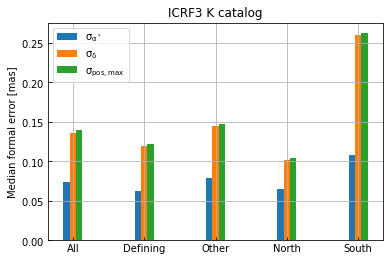

In [14]:
# Plot the median formal error

# Median formal error
med_ra = np.array([
    np.median(icrf3_k["ra_err"].filled()),
    np.median(icrf3_k_def["ra_err"].filled()),
    np.median(icrf3_k_oth["ra_err"].filled()),
    np.median(icrf3_k_nor["ra_err"].filled()),
    np.median(icrf3_k_sou["ra_err"].filled())
])

med_dec = np.array([
    np.median(icrf3_k["dec_err"].filled()),
    np.median(icrf3_k_def["dec_err"].filled()),
    np.median(icrf3_k_oth["dec_err"].filled()),
    np.median(icrf3_k_nor["dec_err"].filled()),
    np.median(icrf3_k_sou["dec_err"].filled())
])

med_pos = np.array([
    np.median(icrf3_k["pos_err"].filled()),
    np.median(icrf3_k_def["pos_err"].filled()),
    np.median(icrf3_k_oth["pos_err"].filled()),
    np.median(icrf3_k_nor["pos_err"].filled()),
    np.median(icrf3_k_sou["pos_err"].filled()),
])

names = ["All", "Defining", "Other", "North", "South"]

pos = np.arange(len(names)) + 1
width = 0.8 / (2 * len(names) - 1)

fig, ax = plt.subplots()
ax.bar(pos - width, med_ra, width=width, label="$\mathrm{\sigma_{\\alpha^*}}$")
ax.bar(pos, med_dec, width=width, label="$\mathrm{\sigma_{\\delta}}$")
ax.bar(pos + width, med_pos, width=width, label="$\mathrm{\sigma_{pos,max}}$")

ax.set_xticks(pos)
ax.set_xticklabels(names)

ax.set_ylabel("Median formal error [mas]")

ax.set_title("ICRF3 K catalog")

ax.legend()
ax.grid()

plt.savefig("../plots/icrf3_k_median_error.eps")

In [15]:
# Median formal error
print("Median formal error in ICRF3 K catalog [mas]:  \n"
      "-----------------------------------------------\n"
      "           R.A. cos(decl.)    Decl.     EEMA   \n"
      "All        %6.3f             %6.3f    %6.3f    \n"
      "Defining   %6.3f             %6.3f    %6.3f    \n"
      "Other      %6.3f             %6.3f    %6.3f    \n" 
      "North      %6.3f             %6.3f    %6.3f    \n"
      "South      %6.3f             %6.3f    %6.3f    \n"% 
    (med_ra[0], med_dec[0], med_pos[0],
     med_ra[1], med_dec[1], med_pos[1],
     med_ra[2], med_dec[2], med_pos[2],
     med_ra[3], med_dec[3], med_pos[3],
     med_ra[4], med_dec[4], med_pos[4]
    ))

Median formal error in ICRF3 K catalog [mas]:  
-----------------------------------------------
           R.A. cos(decl.)    Decl.     EEMA   
All         0.074              0.136     0.139    
Defining    0.063              0.120     0.122    
Other       0.079              0.145     0.147    
North       0.065              0.101     0.104    
South       0.108              0.259     0.262    



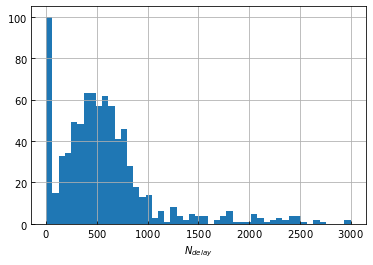

In [33]:
bins = np.linspace(0, 3000, 50)

fig, ax = plt.subplots()

ax.hist(icrf3_k["nb_del"], bins)
ax.set_xlabel("$N_{delay}$")
ax.grid()

plt.savefig("../plots/icrf3_k_nobs_hist.eps")